In [14]:
### generate data
import numpy as np
np.random.seed(0)

def generate_data(n_samples, true_coefficients, noise_level=0.1):

    # Generate a random input signal
    k = len(true_coefficients)
    m, n = true_coefficients[0].shape

    x = np.random.randn(n_samples, m)

    # Generate the desired signal by passing the input through the known system
    y = np.zeros((n_samples, n)) 

    for j in range(k):
        y += np.dot(x, true_coefficients[j]) 
    y += noise_level * np.random.randn(n_samples, n)
    
    return x, y

# Example usage
n_samples = 3000
# a series of matrix: k x m x n 
# k : influence scope 5
# m : output dimension  3
# n : input dimension 2

k = 1
m = 3
n = 2
true_coefficients = [np.random.randn(3, 2) for _ in range(1)]
noise_level = 0.1
x, y = generate_data(n_samples, true_coefficients, noise_level)
print("Input signal:", x[:3])
print("Desired signal:", y[:3])

Input signal: [[ 0.95008842 -0.15135721 -0.10321885]
 [ 0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323]]
Desired signal: [[ 1.04268415  0.31013592]
 [ 3.56652697 -0.97092504]
 [ 2.30427616  0.12140702]]


In [15]:
print(true_coefficients[0].shape)
print(true_coefficients[0])
print(true_coefficients[0].reshape(-1,1))

(3, 2)
[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]
[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]]


In [16]:
### LMS filter
k = len(true_coefficients)
def lms_filter(x, y, k, mu ):
    Ws = [] 
    m, n = x.shape[1], y.shape[1]
    print(m, n)
    w = [np.random.randn(m, n) for _ in range(k)]  # k x m x n
    e = np.zeros((n_samples, n))
    for i in range(k, len(x)):
        y_hat = np.zeros((n,))
        for j in range(k):
            y_hat += np.dot(x[i-j], w[j])
        error = y[i] - y_hat 
        e[i] = error
        for j in range(k):
            w[j] += mu *  np.outer(x[i-j], error)
        Ws.append(w.copy())
    return w,e, Ws


In [17]:
w,e, Ws = lms_filter(x, y, k, 0.01)
print("Estimated coefficients:", w[0])
print ("True coefficients:", true_coefficients[0])

3 2
Estimated coefficients: [[ 1.75129307  0.39046497]
 [ 0.96745412  2.23546372]
 [ 1.86267246 -0.97563017]]
True coefficients: [[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


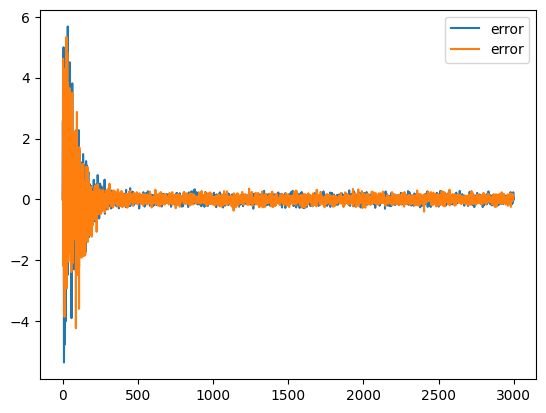

In [18]:
### plot the error
import matplotlib.pyplot as plt
plt.figure()
plt.plot(e, label='error')
plt.legend()
plt.show()


In [19]:
### save Ws to file
import pickle
with open('NoMemLMSWs.pkl', 'wb') as f:
    pickle.dump(Ws, f)
